# 📓 Feature Engineering Notebook 

- Here we will convert features to correct data types
- create features from other features
- decide a list of features to keep

# ---
# 📥 Load Cleaned Data
df = pd.read_csv("../data/processed/cleaned_house_data.csv")
df.head()


# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import getpass


# Load Data

In [2]:
data_loc = Path(f'/home/ExraDrive/house_prices/raw_data')

df = pd.read_csv(data_loc /'train.csv')

In [61]:
save_loc = Path('/home/ExraDrive/house_prices/processed')

In [10]:
pd.set_option('display.max_columns',None)

# 🔍 3. Initial Data Exploration

In [3]:


# Print dataset shape: rows × columns
print("Dataset shape (colums, rows):", df.shape)



Dataset shape (colums, rows): (1460, 81)


In [4]:
# Print summary of column names, types, null counts, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Show basic stats (mean, min, max, std) for numeric columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


 ## 🧠 Why this matters:
- This gives a quick overview of the data:
- Are there missing values?
- What kind of columns are there (numeric, text)?
- Do the values look reasonable?n


# Clean Data

- here for numeric features fill missing data with median
- for categorical features fill missing with mode


In [6]:
clean_df = df.copy()

In [7]:
columns = clean_df.columns.tolist()

In [8]:
for col in columns:
    missing_count = clean_df[col].isnull().sum()
    if missing_count >0:
        print(f'We have missing values in column: {col}')
        if pd.api.types.is_numeric_dtype(clean_df[col]):
            print(f'our column is of numeric and will fill na with median')
            median_value = clean_df[col].median()
            clean_df[col].fillna(median_value,inplace=True)
        else:
            print(f'column is of non numeric type will fill na with mode')
            mode_value = clean_df[col].mode()
            clean_df[col].fillna(mode_value,inplace=True)
print('all done cleaning data')

We have missing values in column: LotFrontage
our column is of numeric and will fill na with median
We have missing values in column: Alley
column is of non numeric type will fill na with mode
We have missing values in column: MasVnrType
column is of non numeric type will fill na with mode
We have missing values in column: MasVnrArea
our column is of numeric and will fill na with median
We have missing values in column: BsmtQual
column is of non numeric type will fill na with mode
We have missing values in column: BsmtCond
column is of non numeric type will fill na with mode
We have missing values in column: BsmtExposure
column is of non numeric type will fill na with mode
We have missing values in column: BsmtFinType1
column is of non numeric type will fill na with mode
We have missing values in column: BsmtFinType2
column is of non numeric type will fill na with mode
We have missing values in column: Electrical
column is of non numeric type will fill na with mode
We have missing valu

/tmp/ipykernel_78036/3606912830.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df[col].fillna(median_value,inplace=True)
/tmp/ipykernel_78036/3606912830.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [11]:
clean_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Convert data types

from reviewing data some features are categorical that should be numeric



In [17]:
cols_to_int = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
               'KitchenAbvGr','Fireplaces','YrSold']

In [18]:
for col in cols_to_int:
    clean_df[col]=clean_df[col].astype(int)

In [19]:
clean_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 🎯 Feature Engineering

Using the feateures we have create new ones or change ones we have like ones with imbalance combine categories

In [20]:
clean_df['age_at_sale']=clean_df['YrSold'] - clean_df['YearBuilt']

In [21]:
clean_df['house_have_remodel']=np.where(clean_df['YearBuilt']!=clean_df['YearRemodAdd'],'yes','no')

In [22]:
clean_df['house_have_remodel'].value_counts(normalize=True)

house_have_remodel
no     0.523288
yes    0.476712
Name: proportion, dtype: float64

In [24]:
clean_df.loc[:,['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF']].head()

,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
0,706,150,856
1,978,284,1262
2,486,434,920
3,216,540,756
4,655,490,1145


In [25]:
clean_df.loc[:,['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','SalePrice']].corr()

,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,SalePrice
BsmtFinSF1,1.000000,-0.495251,0.522396,0.386420
BsmtUnfSF,-0.495251,1.000000,0.415360,0.214479
TotalBsmtSF,0.522396,0.415360,1.000000,0.613581
SalePrice,0.386420,0.214479,0.613581,1.000000


In [26]:
clean_df['ratio_finished_bsmt']=clean_df['BsmtFinSF1']/clean_df['TotalBsmtSF']

In [31]:
clean_df['ratio_finished_bsmt'].describe()

count    1423.000000
mean        0.405387
std         0.344140
min         0.000000
25%         0.000000
50%         0.449898
75%         0.720102
max         1.000000
Name: ratio_finished_bsmt, dtype: float64

In [27]:
clean_df.loc[:,['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','ratio_finished_bsmt','SalePrice']].corr()

,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,ratio_finished_bsmt,SalePrice
BsmtFinSF1,1.000000,-0.495251,0.522396,0.849792,0.386420
BsmtUnfSF,-0.495251,1.000000,0.415360,-0.751371,0.214479
TotalBsmtSF,0.522396,0.415360,1.000000,0.109099,0.613581
ratio_finished_bsmt,0.849792,-0.751371,0.109099,1.000000,0.139733
SalePrice,0.386420,0.214479,0.613581,0.139733,1.000000


In [28]:
clean_df['total_full_baths']=clean_df['FullBath']+clean_df['BsmtFullBath']
clean_df['total_half_baths']=clean_df['BsmtHalfBath']+clean_df['HalfBath']

In [29]:
clean_df['bed_bath_ratio'] = clean_df['BedroomAbvGr'] / clean_df['total_full_baths']

In [33]:
clean_df['bed_bath_ratio'] = clean_df['bed_bath_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [36]:
clean_df['GarageFinish'].isnull().sum()

81

In [37]:
clean_df['GarageType'].isnull().sum()

81

In [38]:
clean_df['has_garage']=np.where(~clean_df['GarageType'].isnull(),'yes','no')
clean_df['garage_finsihed']=np.where((clean_df['GarageFinish']=='RFn')|(clean_df['GarageFinish']=='Fin'),'yes','no')


## 📊 Quick Look at Engineered Data


In [39]:
clean_df[['age_at_sale', 'bed_bath_ratio', 'ratio_finished_bsmt']].describe()

,age_at_sale,bed_bath_ratio,ratio_finished_bsmt
count,1460.000000,1460.000000,1423.000000
mean,36.547945,1.650628,0.405387
std,30.250152,0.787441,0.344140
min,0.000000,0.000000,0.000000
25%,8.000000,1.000000,0.000000
50%,35.000000,1.500000,0.449898
75%,54.000000,2.000000,0.720102
max,136.000000,5.000000,1.000000


# 📊 5. Visualize the New Features

/home/wwood/miniconda3/envs/ml_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


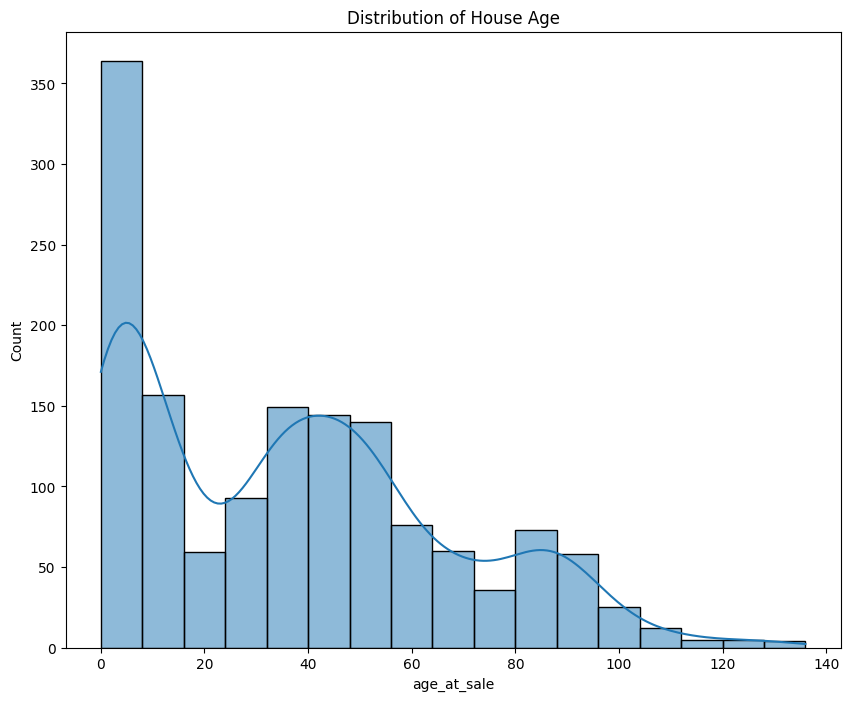

In [40]:
plt.figure(figsize=(10,8))
sns.histplot(clean_df['age_at_sale'], kde=True)
plt.title('Distribution of House Age')
plt.show()

/home/wwood/miniconda3/envs/ml_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wwood/miniconda3/envs/ml_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


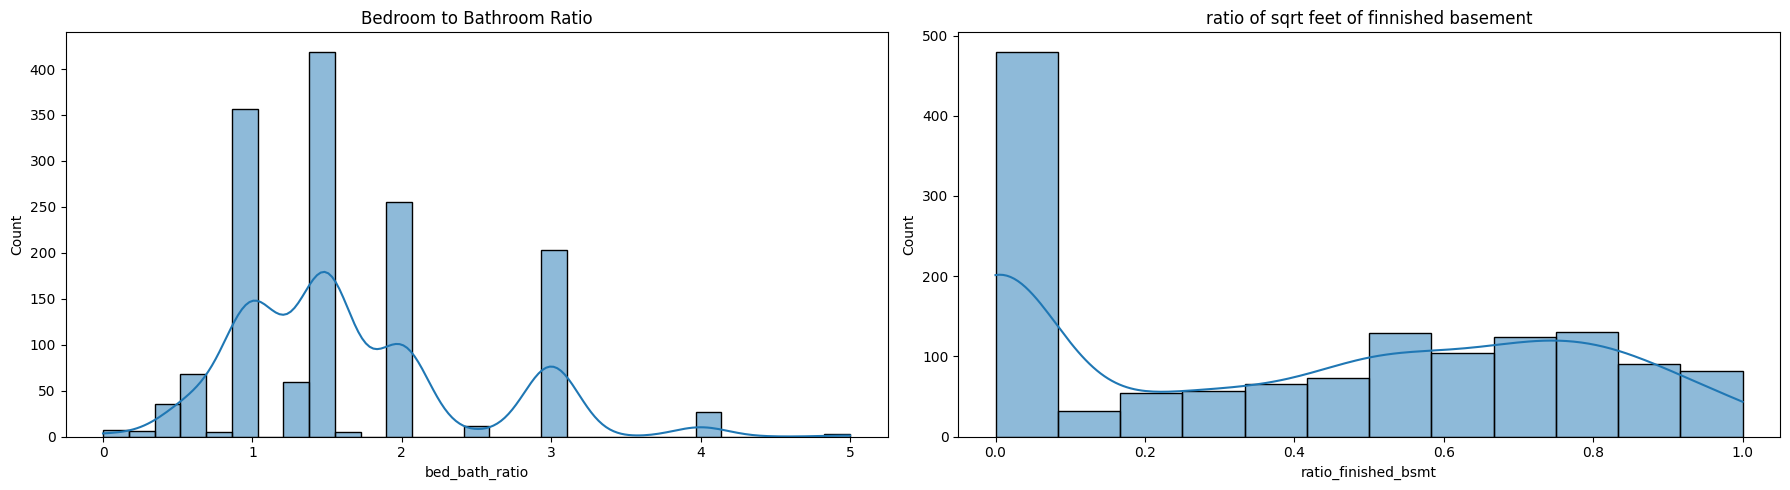

In [41]:
# 📊 5. Visualize the New Features

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.histplot(clean_df['bed_bath_ratio'], kde=True, ax=axs[0])
axs[0].set_title('Bedroom to Bathroom Ratio')

sns.histplot(clean_df['ratio_finished_bsmt'], kde=True, ax=axs[1])
axs[1].set_title('ratio of sqrt feet of finnished basement')

plt.tight_layout()
plt.show()


# Save Final list of features for modelling

In [42]:
clean_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
features_to_use=['OverallQual','OverallCond','age_at_sale','house_have_remodel','GrLivArea','TotalBsmtSF',
                 'ratio_finished_bsmt','total_full_baths','total_half_baths','BedroomAbvGr',
                 'bed_bath_ratio','has_garage','garage_finsihed','SalePrice']

In [57]:
feature_df = pd.DataFrame(clean_df,columns=features_to_use)

In [59]:
feature_df.rename(columns={'garage_finsihed':'garage_finished'},inplace=True)

In [60]:
feature_df.head()

,OverallQual,OverallCond,age_at_sale,house_have_remodel,GrLivArea,TotalBsmtSF,ratio_finished_bsmt,total_full_baths,total_half_baths,BedroomAbvGr,bed_bath_ratio,has_garage,garage_finished,SalePrice
0,7,5,5,no,1710,856,0.824766,3,1,3,1.000000,yes,yes,208500
1,6,8,31,no,1262,1262,0.774960,2,1,3,1.500000,yes,yes,181500
2,7,5,7,yes,1786,920,0.528261,3,1,3,1.000000,yes,yes,223500
3,7,5,91,yes,1717,756,0.285714,2,0,3,1.500000,yes,no,140000
4,8,5,8,no,2198,1145,0.572052,3,1,4,1.333333,yes,yes,250000


In [62]:
feature_df.to_pickle(save_loc /'house_price_processed.pkl')


# ✅ 8. Summary

- Created domain-informed features: 
- Explored and visualized them
- Built a preprocessing pipeline using sklearn (:todo)
- Saved the preprocessed data and pipeline for downstream ML tasks(:todo)

👨‍🔬 This notebook represents the **data scientist/MLE workflow** for feature engineering,
before these steps are automated via a script like `engineer.py` for production.

📦 Next step: 
- standardized features
- Experimentation to find out the right Algorithm and its Configurations (Hyperparameters)!


# Clean UP

In [63]:
del(df,clean_df,feature_df,features_to_use)

In [64]:
import gc

In [65]:
gc.collect()

806